In [1]:
import pandas as pd
import numpy as np

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('smoking_driking_dataset_Ver01.csv')

In [4]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [5]:
df['sex'] = (df['sex'] != 'Male').astype('int32') # Сконвертировать столбцы в бинарные значения
df = df.loc[0:1000,df.columns.values[:-1]] # убираем целевой признак из данных и сокращаем число строк

In [6]:
# Центрирование признаков
data = df.values
data = data - data.mean(axis=0)


<Axes: >

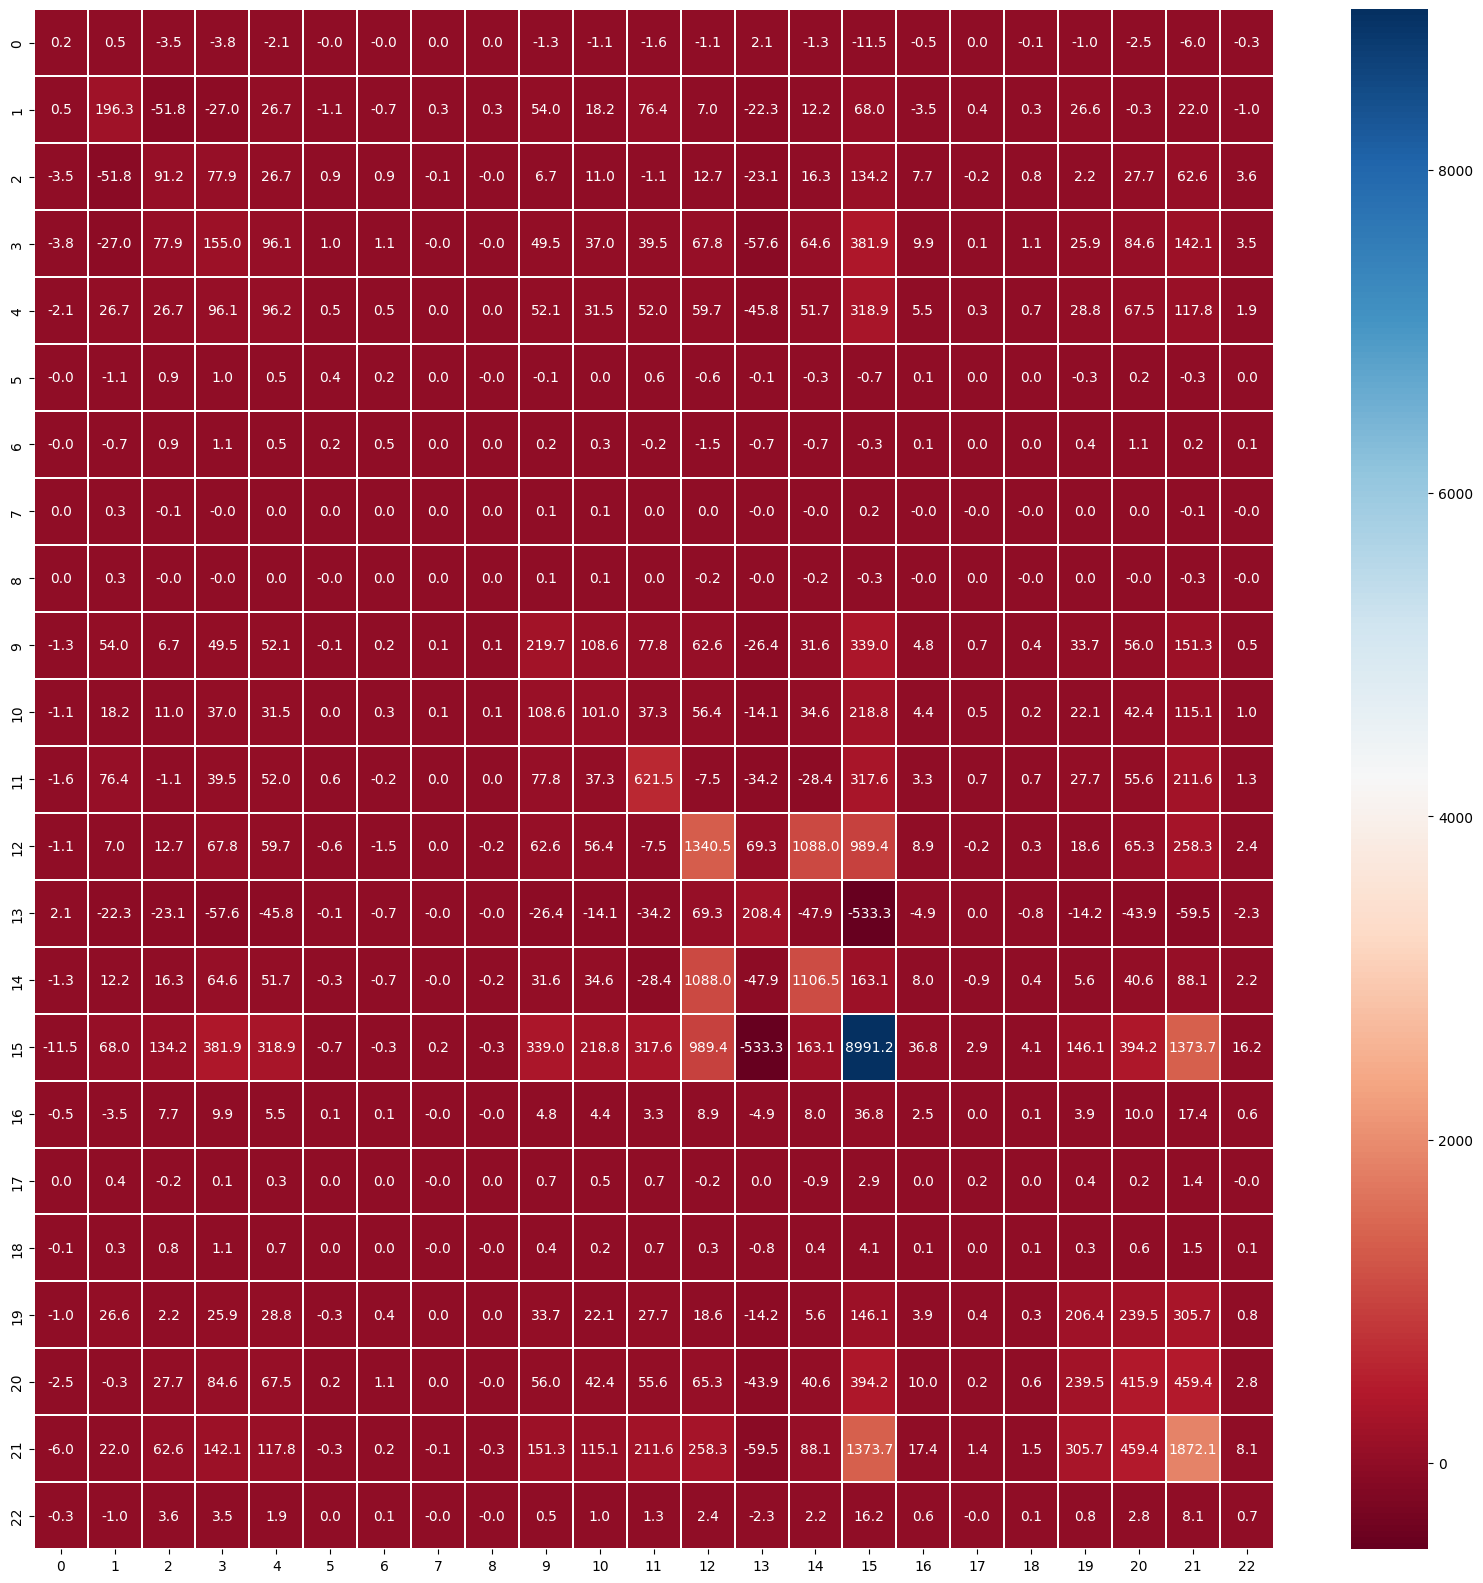

In [9]:
# ковариационная матрица признаков исходного датасета (для дальнейшего анализа)
plt.subplots(figsize=(20, 20))
sns.heatmap(np.cov(data.T),
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu")

In [10]:
def SVD(matrix):
    ## здесь будет функция из п.1
    return np.linalg.svd(matrix)

In [11]:
U, s, V = SVD(data)

**Преимущества и недостатки применения сингулярного и спектрального разложения к задачам PCA**

**+**  это более стабильный и точный метод в отличие от обычного собственного разложения ковариационной матрицы, недостатком которого является вычислительная сложность(такая матрица данных будет огромной, содержащей тысячи данных, очень сложно вычислить собственные значения матрицы ковариации, которые иногда могут вызывать такие ошибки, как ошибки округления).
(https://digitrain.ru/articles/240387/)

___________________________________________
Согласно I.T. Jolliffe - Principal Component Analysis-Springer (2002), PCA лучше вычислять через SVD разложение по следующим причинам:

1) Этот метод обеспечивает эффективный с точки зрения вычислений метод фактического поиска PC.

2) SVD дает дополнительное представление о
том, что на самом деле делает PCA, и предоставляет полезные графические и алгебраические средства для представления результатов PCA.
_________________________________________________

https://skine.ru/articles/381766/

Факторизация SVD, как правило, выполняется быстрее, создает меньше численных проблем (потому что промежуточная ковариационная матрица не нужна, и почти коллинеарные переменные не вызывают для нее проблем).

На практике SVD используется при вычислении PCA для больших реалистичных наборов данных.



#### Выбор числа главных компонент
Произведем выбор числа главных компонент по правилу Кайзера: значимы те главные компоненты, для которых собственное значение превосходит среднюю выборочную дисперсию координат вектора данных.

In [14]:
eigenvalues = np.square(s)
eigenvalues

In [17]:
PC_num = np.argmax(eigenvalues <= np.mean(eigenvalues)) + 1
PC_num

4

Визуализируем долю объясненной дисперсии

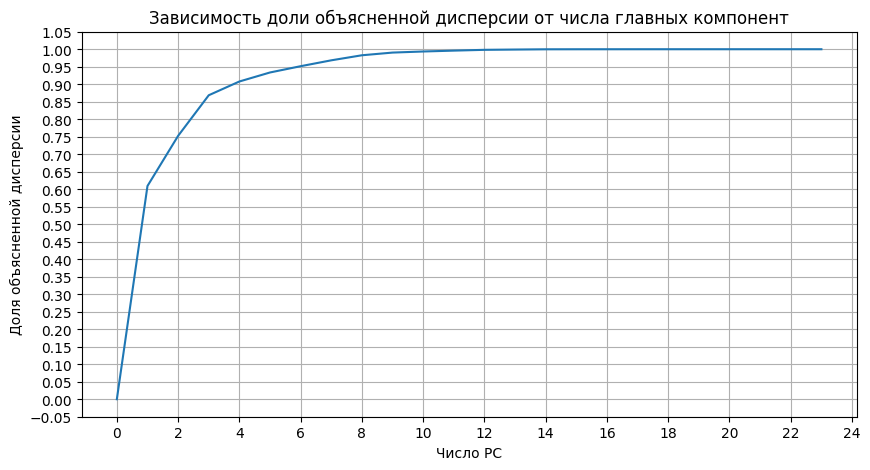

In [18]:
plt.figure(figsize=(10, 5))
plt.title('Зависимость доли объясненной дисперсии от числа главных компонент')
plt.xlabel('Число PC')
plt.ylabel('Доля объясненной дисперсии')
plt.grid()

plt.plot([0] + list(np.cumsum(eigenvalues)/sum(eigenvalues)))
plt.locator_params (axis='y', nbins= 22 )
plt.locator_params (axis='x', nbins= 24 )
plt.show()

In [19]:
cumsum_var = np.cumsum(eigenvalues)/sum(eigenvalues)
round(cumsum_var[PC_num],2)

0.93

Таким образом, 4 главных компоненты покрывают 93% объясненной дисперсии.

In [22]:
# Составили матрицу Сигма
Sigma = np.zeros_like(data, dtype = float)
Sigma[np.diag_indices(min(data.shape))]= s

In [23]:
data_PC = np.dot(U[:, :PC_num], Sigma[:PC_num, :PC_num])
data_PC

array([[ 36.40663719,  15.67797346, -11.51464419,  -0.92178325],
       [  4.78304164,  48.62090765,  11.54623737,   8.16289872],
       [ 28.4229306 , -55.86809175, -54.09396298,  -9.16251063],
       ...,
       [-94.21653151,  -1.21993125, -16.73821377, -11.76450349],
       [ 28.49303395,  94.08844689,  32.6254664 ,   5.06807318],
       [  8.05398445, -17.96194888,  23.59185368,  -9.94422903]])

In [21]:
# Проверка
from sklearn.decomposition import PCA
pca = PCA(n_components = PC_num)
XPCAreduced = pca.fit_transform(data)
XPCAreduced

array([[-36.40663719,  15.67797346,  11.51464419,  -0.92178325],
       [ -4.78304164,  48.62090765, -11.54623737,   8.16289872],
       [-28.4229306 , -55.86809175,  54.09396298,  -9.16251063],
       ...,
       [ 94.21653151,  -1.21993125,  16.73821377, -11.76450349],
       [-28.49303395,  94.08844689, -32.6254664 ,   5.06807318],
       [ -8.05398445, -17.96194888, -23.59185368,  -9.94422903]])

<Axes: >

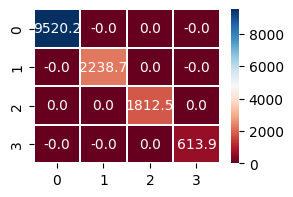

In [27]:
#sns.set(font_scale=1)
plt.subplots(figsize=(3, 2))
sns.heatmap(np.cov(data_PC.T),
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu")

Сравним ковариационные матрицы датасетов до и после применения метода главных компонент:

* полученные компоненты обладают большим разбросом данных;
* корреляции между отдельными компонентами обратились в нуль.